In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

# preprocessing data

In [240]:
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books.rename(columns = {'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher' },inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

## Understanding the data

In [241]:
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [141]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [142]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [143]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 5)
(1149780, 3)
(278858, 3)


In [144]:
books.isnull().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [145]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [146]:
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [147]:
books.duplicated().sum()

0

In [148]:
ratings.duplicated().sum()

0

In [149]:
users.duplicated().sum()

0

<AxesSubplot:xlabel='rating', ylabel='Density'>

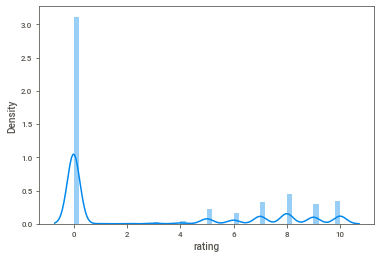

In [164]:
sns.distplot(ratings['rating'])

# Exporatory Data Analysis

In [177]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
59727       201
188951      201
268622      201
9856        201
155916      201
Name: user_id, Length: 899, dtype: int64

In [244]:
x = ratings['user_id'].value_counts() >100
y = x[x].index #user_ids
print(y.shape)
ratings = ratings[ratings['user_id'].isin(y)]

(1825,)


In [245]:
rating_books = ratings.merge(books, on='ISBN')
rating_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [246]:
number_rating = rating_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns = {'rating':'number_of_ratings'},inplace=True)
final_rating = rating_books.merge(number_rating, on ='title')
final_rating.shape


(604854, 8)

In [247]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [248]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,105
...,...,...,...,...,...,...,...,...
365112,185233,067081458X,5,The Eyes of the Dragon,Stephen King,1987,Viking Books,62
365114,211426,067081458X,0,The Eyes of the Dragon,Stephen King,1987,Viking Books,62
365115,236283,067081458X,10,The Eyes of the Dragon,Stephen King,1987,Viking Books,62
365116,245371,067081458X,0,The Eyes of the Dragon,Stephen King,1987,Viking Books,62


In [249]:
final_rating.shape

(97962, 8)

In [250]:
pivot = final_rating.pivot_table(columns='user_id',index='title', values='rating')
pivot.fillna(0, inplace=True)

In [251]:
pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(pivot)

In [253]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [260]:
distances, suggestions = model.kneighbors(pivot.iloc[153, :].values.reshape(1, -1)) #here i used index numbers for books.

In [261]:
for i in range(len(suggestions)):
    print(pivot.index[suggestions[i]])

Index(['Dr. Atkins' New Diet Revolution',
       'Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))',
       'Ground Zero and Beyond',
       'Ruthless.Com (Tom Clancy's Power Plays (Paperback))',
       'Personal Injuries'],
      dtype='object', name='title')
